In [2]:
import torch
from model import Model, restore
from dataset import ModisDataset, download_url
import matplotlib.pyplot as plt
import numpy as np
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

tumblack = "#000000"
tumblue = "#0065bd"
tumorange = "#e37222"
tumbluelight = "#64a0c8"
tumgray = "#999999"
tumlightgray = "#dad7cb"

In [13]:
dataset = ModisDataset(region="germany",fold="train", znormalize=True)
data = dataset.data
date = dataset.date

local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz


In [24]:
import pandas as pd
pd.DataFrame([data[0,:,0],date[0]]).T

,0,1
0,-0.831863,2000-02-18
1,-1.23128,2000-03-05
2,-0.480205,2000-03-21
3,0.97245,2000-04-06
4,1.47606,2000-04-22
...,...,...
450,1.49343,2019-09-14
451,1.21818,2019-09-30
452,0.104157,2019-10-16
453,-0.912615,2019-11-01


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  454
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -860.675
Method:                       css-mle   S.D. of innovations              1.611
Date:                Thu, 19 Dec 2019   AIC                           1735.349
Time:                        16:34:59   BIC                           1764.176
Sample:                             1   HQIC                          1746.707
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.045      0.046      0.964      -0.086       0.090
ar.L1.D.y     -0.3600      0.047     -7.701      0.000      -0.452      -0.268
ar.L2.D.y     -0.1425      0.050     -2.869      0.0

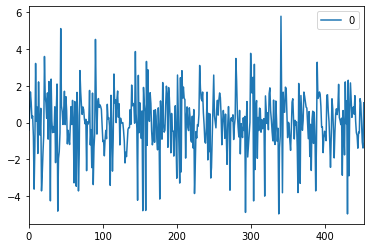

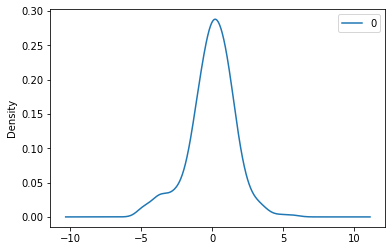

                0
count  454.000000
mean     0.000641
std      1.612455
min     -4.953833
25%     -0.845812
50%      0.099296
75%      0.970622
max      5.772047


In [25]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot


model = ARIMA(data[0,:,0], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

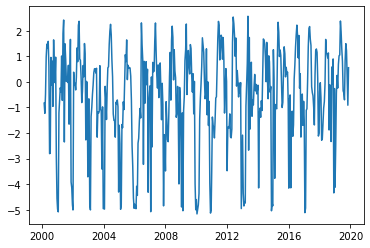

In [35]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

date_ = date[0].astype(np.datetime64)
plt.plot(date_,data[0])


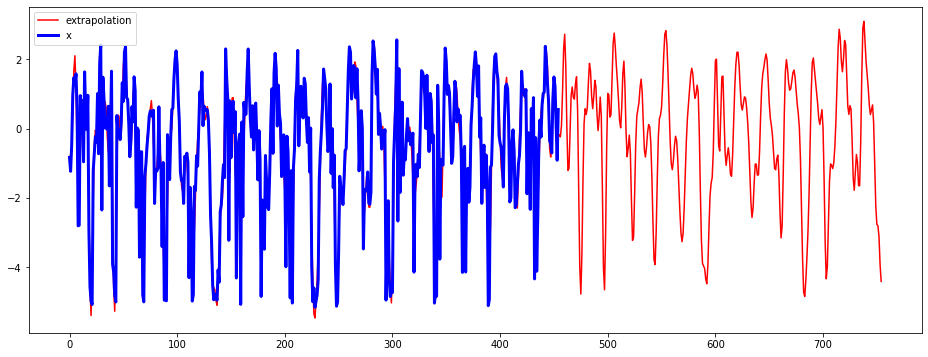

In [88]:
import numpy as np
import pylab as pl
from numpy import fft


x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
x = data[0,:,0]
n_predict = 300

n = x.size
n_harm = 90                    # number of harmonics in model
t = np.arange(0, n)
p = np.polyfit(t, x, 1)         # find linear trend in x
x_notrend = x - p[0] * t        # detrended x
x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
f = fft.fftfreq(n)              # frequencies

indexes = np.absolute(f).argsort()

t = np.arange(0, n + n_predict)
restored_sig = np.zeros(t.size)
for i in indexes[:1 + n_harm * 2]:
    ampli = np.absolute(x_freqdom[i]) / n   # amplitude
    phase = np.angle(x_freqdom[i])          # phase
    restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
extrapolation = restored_sig + p[0] * t

plt.subplots(figsize=(16,6))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()
    

In [78]:
data[0,:,0]

array([-8.31863294e-01, -1.23127812e+00, -4.80204589e-01,  9.72449765e-01,
        1.47605976e+00,  1.30934749e+00,  1.58459640e+00,  6.23395939e-01,
       -2.80636180e+00, -2.79333740e+00,  9.55952196e-01, -1.27677591e-01,
        8.10078955e-01, -9.57765794e-01,  1.64103545e+00,  4.52342199e-01,
       -2.95604711e-02,  9.65503420e-01, -2.93834235e+00, -4.56205045e+00,
       -4.97969943e+00, -5.08215801e+00, -1.21391226e+00, -7.46770571e-01,
       -2.32741056e-01, -4.00321624e-01,  1.01152295e+00, -7.25063243e-01,
        1.87894776e+00,  2.41815777e+00, -2.34963963e+00,  1.48734757e+00,
        8.76937524e-01,  1.81956494e-02,  1.81434752e-01, -2.43507125e-02,
        6.47708146e-01, -1.65326857e+00, -2.07560556e-01,  1.66013790e+00,
       -3.91430379e+00, -4.14353317e+00, -4.80690910e+00, -5.00835310e+00,
        3.78537285e-01, -1.25941005e-01, -5.21360916e-02, -3.15228901e-01,
        1.77093286e-01,  1.32758164e+00,  7.90108214e-01,  2.21237231e+00,
        2.36953336e+00,  

In [67]:
restored_sig.shape

(388,)

In [68]:
t.shape

(388,)

In [69]:
p[0]

1.3907894578204307

In [72]:
extrapolation = restored_sig + p[0] * t

In [74]:
x_notrend = x - p[0] * t  

ValueError: operands could not be broadcast together with shapes (288,) (388,) 